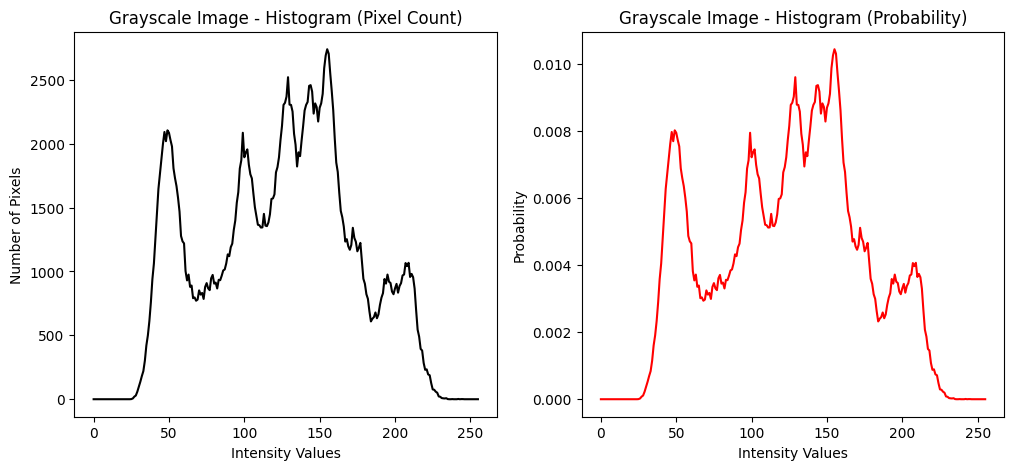

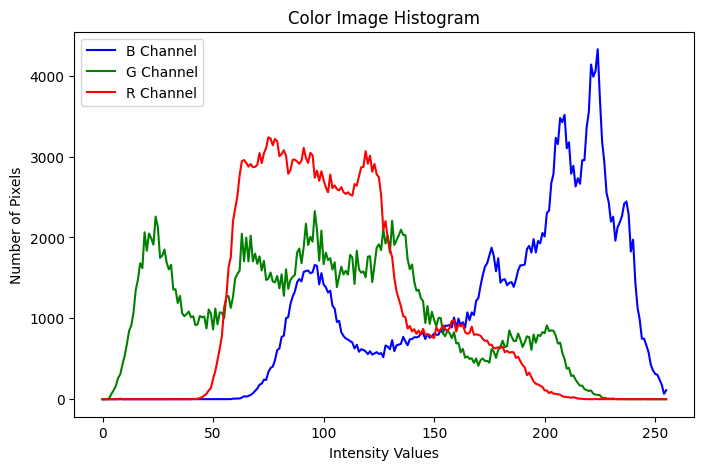

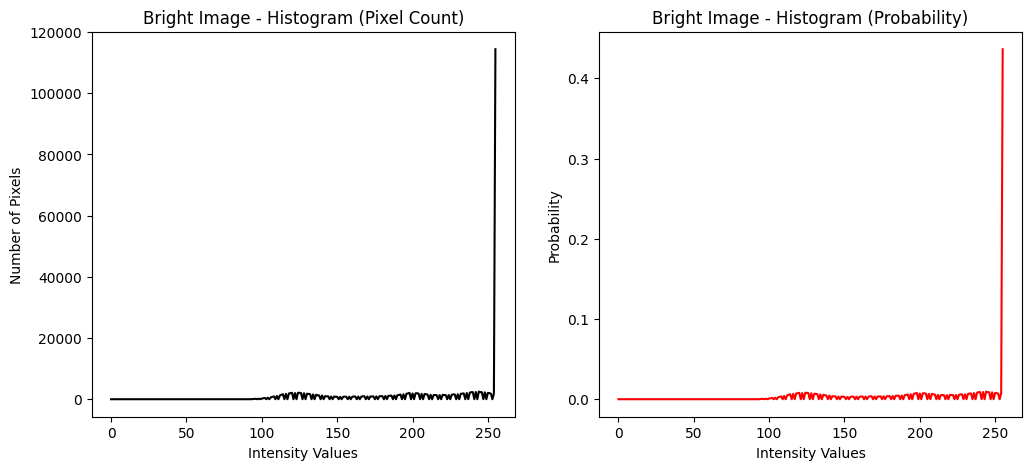

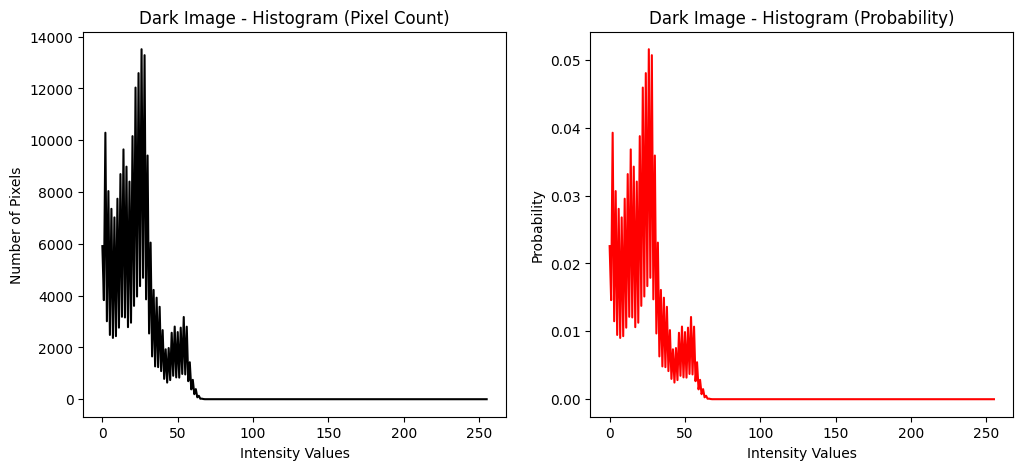

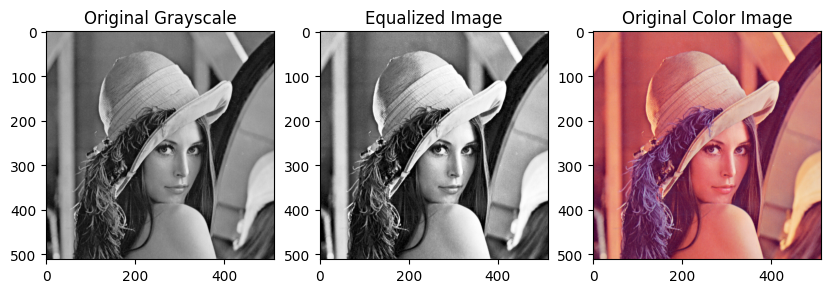

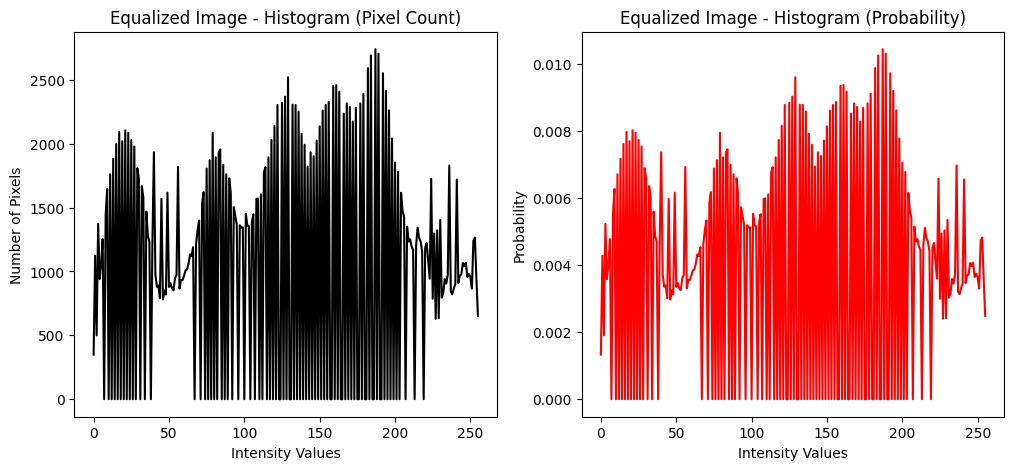

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image, title):
    """Computes and plots histogram for grayscale image"""
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_prob = hist / hist.sum()  # Probability distribution

    plt.figure(figsize=(12, 5))

    # Method 1: Histogram with pixel count
    plt.subplot(1, 2, 1)
    plt.plot(hist, color='black')
    plt.title(f'{title} - Histogram (Pixel Count)')
    plt.xlabel('Intensity Values')
    plt.ylabel('Number of Pixels')

    # Method 2: Histogram with probability
    plt.subplot(1, 2, 2)
    plt.plot(hist_prob, color='red')
    plt.title(f'{title} - Histogram (Probability)')
    plt.xlabel('Intensity Values')
    plt.ylabel('Probability')

    plt.show()

def process_color_image(image):
    """Computes histograms for each channel in a color image."""
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(8, 5))

    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=f'{color.upper()} Channel')

    plt.title('Color Image Histogram')
    plt.xlabel('Intensity Values')
    plt.ylabel('Number of Pixels')
    plt.legend()
    plt.show()

def histogram_equalization(image):
    """Enhances image contrast using histogram equalization."""
    equalized = cv2.equalizeHist(image)
    return equalized

def main():
    # Load color image
    image_color = cv2.imread('/content/Lena_Image.png')  # Replace with your image path
    image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

    # Compute and visualize histograms
    compute_histogram(image_gray, 'Grayscale Image')
    process_color_image(image_color)

    # Bright and dark image comparison
    bright_image = cv2.convertScaleAbs(image_gray, alpha=1.5, beta=50)
    dark_image = cv2.convertScaleAbs(image_gray, alpha=0.5, beta=-50)

    compute_histogram(bright_image, 'Bright Image')
    compute_histogram(dark_image, 'Dark Image')

    # Histogram Equalization
    equalized_image = histogram_equalization(image_gray)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Grayscale')

    plt.subplot(1, 3, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')

    plt.subplot(1, 3, 3)
    plt.imshow(image_color)
    plt.title('Original Color Image')

    plt.show()

    compute_histogram(equalized_image, 'Equalized Image')

if __name__ == "__main__":
    main()


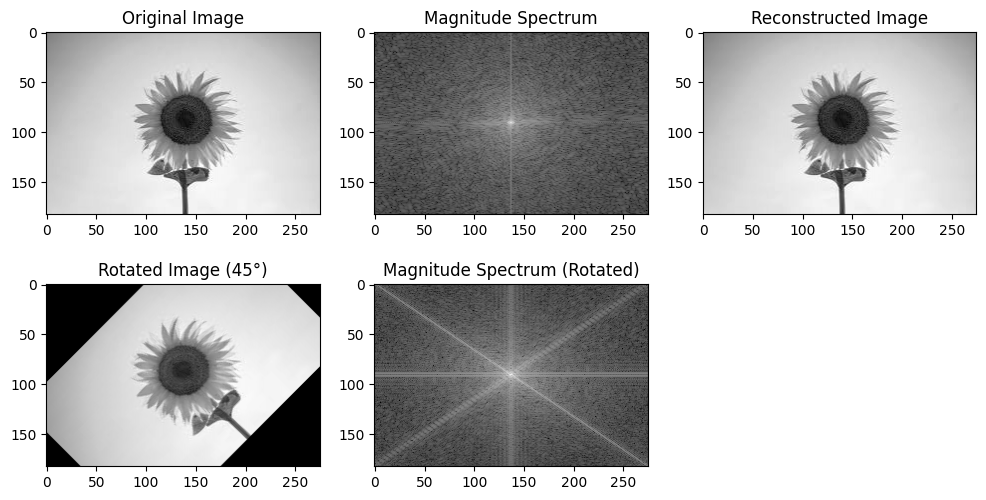

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(image):
    """Computes the FFT and magnitude spectrum of an image."""
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

    return dft, dft_shift, magnitude_spectrum

def compute_ifft(dft):
    """Computes the Inverse FFT to reconstruct the original image."""
    dft_shift = np.fft.ifftshift(dft)
    img_reconstructed = np.fft.ifft2(dft_shift)
    img_reconstructed = np.abs(img_reconstructed)

    return img_reconstructed

def rotate_image(image, angle):
    """Rotates the image by a given angle."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

def main():
    # Load grayscale image
    image = cv2.imread('/content/Flower.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

    # Compute FFT and display magnitude spectrum
    dft, dft_shift, magnitude_spectrum = compute_fft(image)

    # Compute IFFT to reconstruct image
    reconstructed_image = compute_ifft(dft_shift)

    # Rotate image by 45 degrees and compute its FFT
    rotated_image = rotate_image(image, 45)
    _, _, rotated_magnitude_spectrum = compute_fft(rotated_image)

    # Display images and results
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')

    plt.subplot(2, 3, 3)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image')

    plt.subplot(2, 3, 4)
    plt.imshow(rotated_image, cmap='gray')
    plt.title('Rotated Image (45°)')

    plt.subplot(2, 3, 5)
    plt.imshow(rotated_magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (Rotated)')

    plt.show()

if __name__ == "__main__":
    main()
